# Algorithm:
1. Randomly assign K centres.
2. Calculate the distance of all the points from all the K centres and allocate the points to cluster based on the shortest distance. The model’s inertia is the mean squared distance between each instance and its closest centroid. The goal is to have a model with the lowes intertia.
3. Once all the points are assigned to clusters, recompute the centroids.
4. Repeat the steps 2 and 3 until the locations of the centroids stop changing and the cluster allocation of the points becomes constant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,3:]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


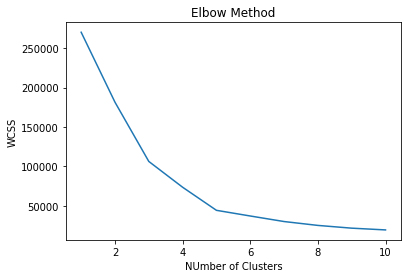

In [6]:
#elbow method to choose the best number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('NUmber of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#choosing elbow value as 5(where the dispersion is smoother)
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_pred = kmeans.fit_predict(x)

In [9]:
print(y_pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [10]:
test = kmeans.predict(np.asarray([[3,3]]))

In [12]:
test[0]

3

In [13]:
#saving the model
import pickle
filename = 'kmeans_model.pickle'
pickle.dump(kmeans,open(filename,'wb'))

In [14]:
#points at cluster 0
x[y_pred==0]

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


No handles with labels found to put in legend.


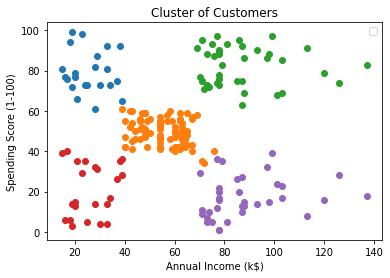

In [19]:
#visualising the clusters
plt.scatter(x[y_pred==0]['Annual Income (k$)'],x[y_pred==0]['Spending Score (1-100)'])
plt.scatter(x[y_pred==1]['Annual Income (k$)'],x[y_pred==1]['Spending Score (1-100)'])
plt.scatter(x[y_pred==2]['Annual Income (k$)'],x[y_pred==2]['Spending Score (1-100)'])
plt.scatter(x[y_pred==3]['Annual Income (k$)'],x[y_pred==3]['Spending Score (1-100)'])
plt.scatter(x[y_pred==4]['Annual Income (k$)'],x[y_pred==4]['Spending Score (1-100)'])
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

A good cluster will have:

* High inter-class similarity, and
* Low intraclass similarity